In [1]:
import pandas as pd
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from IPython.display import Image, display_svg, SVG
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("car_evaluation_with.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,med,unacc
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc


In [4]:
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df.columns = column_names

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc


In [6]:
df.shape

(1726, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1726 non-null   object
 1   maint     1726 non-null   object
 2   doors     1726 non-null   int64 
 3   persons   1726 non-null   int64 
 4   lug_boot  1726 non-null   object
 5   safety    1726 non-null   object
 6   class     1726 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.5+ KB


In [8]:
df.describe()

,doors,persons
count,1726.000000,1726.000000
mean,3.501738,3.668598
std,1.117838,1.247011
min,2.000000,2.000000
25%,3.000000,2.000000
50%,4.000000,4.000000
75%,4.750000,5.000000
max,5.000000,5.000000


In [9]:
df["doors"].unique()

array([2, 3, 4, 5], dtype=int64)

In [10]:
df["doors"].nunique()

4

In [11]:
#replacing 5more with 5
df["doors"]=df["doors"].replace("5more", 5)
df["doors"].unique()

array([2, 3, 4, 5], dtype=int64)

In [12]:
#changing dtype to integer
df["doors"]=df["doors"].astype(int)

In [13]:
df["persons"].unique()

array([2, 4, 5], dtype=int64)

In [14]:
#changing dtype to integer
df["persons"]=df["persons"].astype(int)

In [15]:
# Checking for null vales
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

##### Exploratory Data Analysis
  
How is the the acceptance level distribution?

In [16]:
Class = df['class'].value_counts()
Class

class
unacc    1208
acc       384
good       69
vgood      65
Name: count, dtype: int64

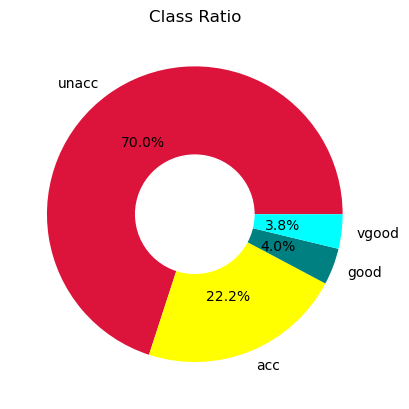

In [17]:
# Create a pie chart
plt.pie(x = Class.values, labels = Class.index, colors = ["crimson", "yellow", "teal", "aqua"], autopct = "%1.1f%%")
plt.title("Class Ratio")
my_circle = plt.Circle((0, 0), 0.4, color = "white")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The anacceptable class has a high distribution

#### Class acceptance based on the number of doors

In [18]:
category_columns = "class"
numerical_columns = "doors"
plt.figure(figsize = (10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

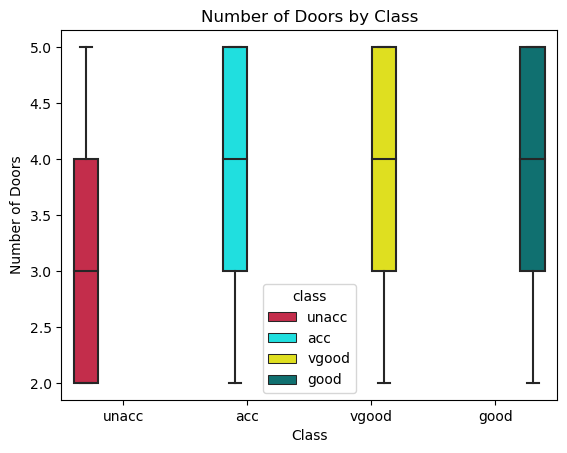

In [19]:
sns.boxplot(x = category_columns, y = numerical_columns, data = df, hue = "class", palette = ["crimson", "aqua",
"yellow", "teal"])
plt.title("Number of Doors by Class")
plt.xlabel("Class")
plt.ylabel("Number of Doors")

plt.show()

The higher the number of doors the higher the level of acceptance

When you pass both the `y` and `hue` arguments to `sns.boxplot`, the resulting plot will display separate boxplots for each unique category in the `hue` variable within each level of the `y` variable. 

Here's what happens:

1. **Separate Boxplots:** 
   - The data is first grouped by the levels of the `y` variable. For each level of `y`, a separate boxplot is drawn.
   - Within each boxplot, the data is further subdivided based on the unique categories in the `hue` variable.
  
2. **Coloring:**
   - Each subgroup defined by the `hue` variable will have a different color or pattern within the boxplot, allowing for easy visual comparison.

3. **Interpretation:**
   - This setup allows you to simultaneously compare the distribution of the numeric variable across different levels of the `y` variable, as well as within each level of `y` across different categories represented by the `hue` variable.

4. **Example:**
   - For example, if you're visualizing exam scores (`y`) across different schools (`hue`) within different grade levels (`y`), each boxplot would represent the distribution of scores for a specific grade level, with different colors or patterns within each boxplot indicating different schools.

In summary, using both `y` and `hue` in `sns.boxplot` allows for a multi-level comparison, where the distribution of the numeric variable (`y`) is examined across different categories represented by both `y` and `hue`.

The acceptance class based on the number of persons

Text(0.5, 1.0, 'Class by Number of Persons')

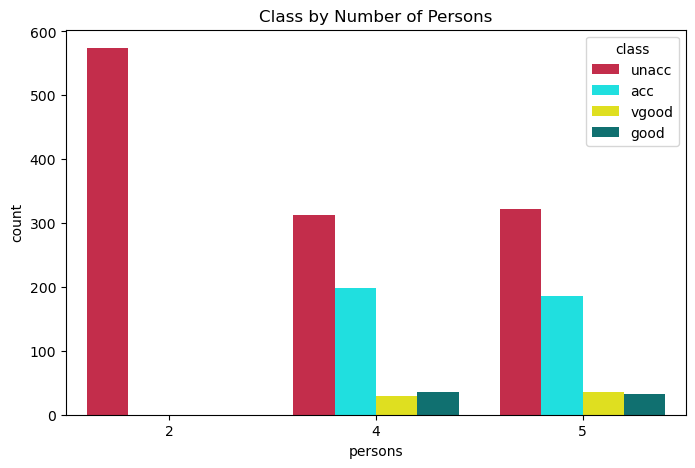

In [20]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "persons", hue = "class", data = df, palette = ["crimson", "aqua", "yellow", "teal"])
plt.title("Class by Number of Persons")

1- A car with a capacity less than two persons is considered unacceptable  
2- The higher the number of persons, the higher the acceptance class.

#### What is the number of persons based on the maintenance price

Text(0, 0.5, 'Number of Persons')

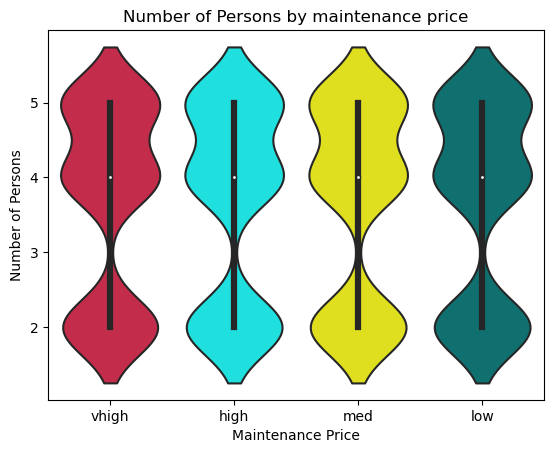

In [21]:
sns.violinplot(data = df, x = "maint", y = "persons", palette = ["crimson", "aqua", "yellow", "teal"])
plt.title("Number of Persons by maintenance price")
plt.xlabel("Maintenance Price")
plt.ylabel("Number of Persons")

The number of persons is not dependent on the maintenance cost

#### Class acceptance level in relation to the safety measure

Text(0.5, 1.0, 'Class by Safety')

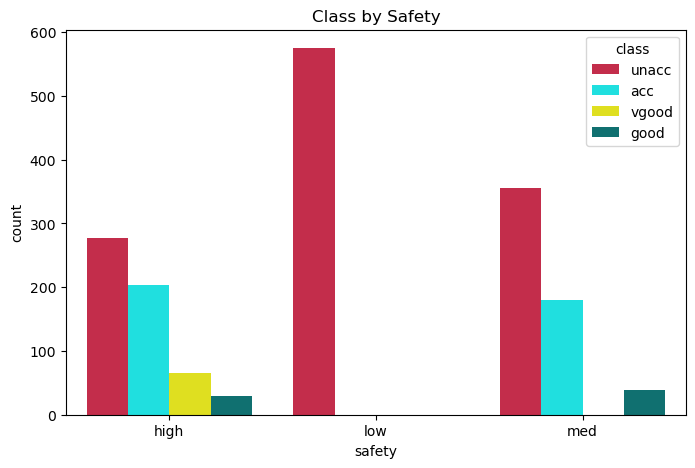

In [22]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "safety", hue = "class", data = df, palette = ["crimson", "aqua", "yellow", "teal"])
plt.title("Class by Safety")

From the visualization, it is clear that low safety is completely cosindered unacceptable car class.  
  
The very goog car class is only found in the category high safety.

#### How is the acceptance class level affected by the maintenance price?

Text(0.5, 1.0, 'Class by maint price')

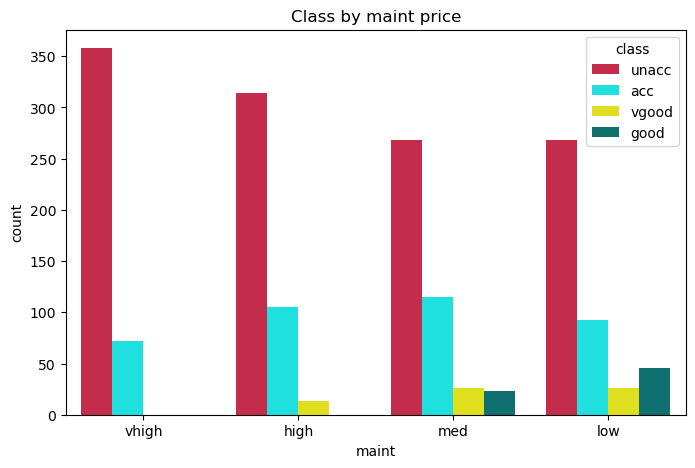

In [23]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "maint", hue = "class", data = df, palette = ["crimson", "aqua", "yellow", "teal"])
plt.title("Class by maint price")

The higher the maintenance price the lower the level of class acceptance

In [24]:
df.columns.dtype

dtype('O')

In [25]:
b = df["buying"].unique()
c = df["maint"].unique()
d = df["lug_boot"].unique()
e = df["safety"].unique()
f = df["class"].unique()
print(b, '\n', c, '\n', d, '\n', e, '\n', f)

['vhigh' 'high' 'med' 'low'] 
 ['vhigh' 'high' 'med' 'low'] 
 ['small' 'med' 'big'] 
 ['high' 'low' 'med'] 
 ['unacc' 'acc' 'vgood' 'good']


#### Data encoding

In [26]:
# Ordinal Encoding
buying_mapping = {"vhigh" : 4, "high" : 3, "med" : 2, "low" : 1}
df["buying_enc"] = df["buying"].map(buying_mapping)
df["buying_enc"].unique()

array([4, 3, 2, 1], dtype=int64)

In [27]:
maint_mapping={'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
df['maint_enc']=df["maint"].map(maint_mapping)
df['maint_enc'].unique()

array([4, 3, 2, 1], dtype=int64)

In [28]:
lugboot_mapping = {"small" : 1, "med" : 2, "big" : 3}
df["lugboot_enc"] = df["lug_boot"].map(lugboot_mapping)
df["lugboot_enc"].unique()

array([1, 2, 3], dtype=int64)

In [29]:
df['doors_enc']=df["doors"]
df['persons_enc']=df["persons"]
df['class_enc']=df["class"]

In [30]:
df_encoded = df.drop(column_names, axis = 1)
df_encoded

,buying_enc,maint_enc,lugboot_enc,doors_enc,persons_enc,class_enc
0,4,4,1,2,2,unacc
1,4,4,2,2,2,unacc
2,4,4,2,2,2,unacc
3,4,4,2,2,2,unacc
4,4,4,3,2,2,unacc
...,...,...,...,...,...,...
1721,1,1,2,5,5,good
1722,1,1,2,5,5,vgood
1723,1,1,3,5,5,unacc
1724,1,1,3,5,5,good


In [31]:
# define features and target
x = df_encoded.drop(columns = ["class_enc"], axis = 1) # Features
y = df_encoded["class_enc"] # Target

## Model Cross Validation Using Stratified K-Fold

In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [33]:
# Create Classifiers
svm_classifier = SVC(kernel = "linear", C = 1)
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
dt_classifier = DecisionTreeClassifier(random_state = 42)

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits = 3, shuffle = True )

# Compare classifiers using cross-validation
svm_scores = cross_val_score(svm_classifier, x, y, cv = stratified_kfold, scoring = "accuracy")
knn_scores = cross_val_score(knn_classifier, x, y, cv = stratified_kfold, scoring = "accuracy")
dt_scores = cross_val_score(dt_classifier, x, y, cv = stratified_kfold, scoring = "accuracy")

# Print average accuracy for each classifier
print("SVM Average Accuracy: ", svm_scores.mean())
print("KNN Average Accuracy: ", knn_scores.mean())
print("Decision Tree Average Accuracy: ", dt_scores.mean())

SVM Average Accuracy:  0.6981451288244767
KNN Average Accuracy:  0.6390438808373591
Decision Tree Average Accuracy:  0.6239794685990337


#### Decision Tree Modelling

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2, random_state = 0)

In [35]:
x_train.shape, y_test.shape

((1380, 5), (346,))

In [36]:
# Fitting the model
dt = DecisionTreeClassifier(max_depth = 4, random_state = 0)
dt.fit(x, y)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [37]:
prediction = dt.predict(x_test)
prediction[:8]

array(['acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc'],
      dtype=object)

In [38]:
# performance of trained classifier on test set
from sklearn.metrics import classification_report
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

         acc       0.52      0.53      0.52        72
        good       0.00      0.00      0.00         0
       unacc       0.86      0.77      0.81       274
       vgood       0.00      0.00      0.00         0

    accuracy                           0.72       346
   macro avg       0.35      0.32      0.33       346
weighted avg       0.79      0.72      0.75       346



### Feature Importances

Quantifying which features are more important in classifying car's class acceptance

In [39]:
feature_names=x_train.columns
dfFeatures = pd.DataFrame({"Features" : feature_names.to_list(), "Importances" : dt.feature_importances_})
dfFeatures.sort_values(by = "Importances", ascending = False)

,Features,Importances
4,persons_enc,0.485441
1,maint_enc,0.287139
0,buying_enc,0.118648
2,lugboot_enc,0.108772
3,doors_enc,0.000000


From the table we can conclude that "safety", "number of persons" and "maintainance price" are the most important features in classifying whether the car is acceptable or unacceptable.

In the given code snippet, `dt.feature_importances_` refers to the feature importances assigned to each feature (or predictor) by the trained decision tree classifier (`dt`).

Here's what it means:

- **Feature Importances**: 
  - After training a decision tree classifier, each feature is assigned an importance score indicating its contribution to the predictive accuracy of the model.
  - Feature importance helps in understanding which features are most influential in making predictions and can be valuable for feature selection and understanding the underlying data relationships.

- **`dt.feature_importances_`**:
  - This attribute of the trained decision tree classifier (`dt`) stores the feature importances.
  - It's an array-like object where each element corresponds to the importance of a feature.
  - The length of this array matches the number of features in the input data.

- **Usage**:
  - By accessing `dt.feature_importances_`, you can analyze and rank the importance of features based on their contribution to the model's predictive performance.
  - In the given code, these feature importances are stored in a DataFrame along with the corresponding feature names for further analysis and interpretation.

- **Interpretation**:
  - Higher feature importance scores indicate that the feature has a stronger influence on the model's predictions.
  - Features with higher importances are considered more informative or influential in the decision-making process of the classifier.

In summary, `dt.feature_importances_` provides insight into the relative importance of each feature in the decision tree classifier's predictions, allowing for feature ranking and interpretation of the model's behavior.

Does the feature importance of each feature given by DecisionTreeClassifier().feature_importance_ is the importance of features for only Decision Tree Classifier or these feature importances can be used to only retain important features and use the dataset with these features for model other than Decision Tree Classifier ?

The feature importance scores provided by `DecisionTreeClassifier().feature_importances_` are specific to the **Decision Tree model** that was trained. They represent how useful each feature was for making decisions (splits) in the tree, and they are computed based on how much each feature reduces the impurity across all splits.

### Can Feature Importances Be Used for Other Models?
Yes, the feature importances calculated by `DecisionTreeClassifier` can be used to **select important features** that may also be valuable for other types of models. Here’s how and why:

1. **Model-Agnostic Feature Selection**:
   - Feature importance scores from a decision tree (or tree-based models like Random Forest) are often used to identify the most important features in a dataset.
   - You can use these importance scores to **retain the top-N most important features**, which can then be used as input to **other models** such as logistic regression, support vector machines, or neural networks.

2. **Why It Can Be Useful**:
   - Decision trees naturally rank features based on their usefulness for predicting the target.
   - This ranking can help reduce the dimensionality of your dataset by **eliminating less informative features**, potentially improving performance for other models and reducing overfitting.

3. **Limitations**:
   - The feature importance provided by a decision tree reflects the importance in the context of that tree. Some models (e.g., linear models or SVM) may perform better or worse based on interactions between features or other characteristics that a decision tree doesn't capture.
   - Therefore, while it's a good starting point, it is always helpful to validate if the reduced set of features actually improves the performance of the new model through **cross-validation or feature selection validation** techniques.

### Example Workflow
Here’s a typical workflow if you want to use feature importance from `DecisionTreeClassifier` to select features for another model:

1. **Train a Decision Tree Classifier** to determine feature importance:
   ```python
   from sklearn.tree import DecisionTreeClassifier

   # Train DecisionTreeClassifier
   dt_model = DecisionTreeClassifier()
   dt_model.fit(X_train, y_train)

   # Get feature importances
   feature_importances = dt_model.feature_importances_
   ```

2. **Select Important Features**:
   ```python
   import numpy as np

   # Set a threshold for feature importance, e.g., select features with importance > 0.01
   important_features = np.where(feature_importances > 0.01)[0]

   # Retain only important features
   X_train_selected = X_train[:, important_features]
   X_test_selected = X_test[:, important_features]
   ```

3. **Train Another Model Using Selected Features**:
   ```python
   from sklearn.ensemble import RandomForestClassifier

   # Train another model (e.g., Random Forest) on selected features
   rf_model = RandomForestClassifier()
   rf_model.fit(X_train_selected, y_train)

   # Evaluate on test set
   y_pred = rf_model.predict(X_test_selected)
   ```

### Summary
- The feature importances from `DecisionTreeClassifier` can **definitely be used to select the most relevant features** for any other model, not just decision trees.
- However, you should evaluate whether using only those selected features **improves performance** with the new model, as different models may value features differently depending on their internal mechanisms.
